# Anime analysis

### Dataset: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset

# Import libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Popular Anime:

### What are the top 10 most popular anime based on user ratings?

In [2]:
# Primero reviso el tipo de dato en las columnas junto con los valores para saber si puedo cambiarlos para ahorrar memoria
# First I check the data type in the columns along with the values to see if I can change them to save memory.
user_ratings_df = pd.read_csv('users-score-2023.csv', nrows=20)

In [3]:
user_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      20 non-null     int64 
 1   Username     20 non-null     object
 2   anime_id     20 non-null     int64 
 3   Anime Title  20 non-null     object
 4   rating       20 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 932.0+ bytes


In [4]:
user_ratings_df['user_id'] = pd.to_numeric(user_ratings_df['user_id'], downcast='unsigned')
user_ratings_df['anime_id'] = pd.to_numeric(user_ratings_df['anime_id'], downcast='unsigned')
user_ratings_df['rating'] = pd.to_numeric(user_ratings_df['rating'], downcast='unsigned')

user_ratings_df['Username'] = user_ratings_df['Username'].astype('category')
user_ratings_df['Anime Title'] = user_ratings_df['Anime Title'].astype('category')

In [5]:
def get_column_types(df):
    dtypes = df.dtypes
    column_names = dtypes.index
    types = [types.name for types in dtypes.values]
    return dict(zip(column_names, types))

In [6]:
column_types = get_column_types(user_ratings_df)

In [7]:
# Dataframe antes del proceso = 927.9+ MB | Dataframe después del proceso = 242.7 MB
# Dataframe before process = 927.9+ MB | Dataframe after process = 242.7 MB
user_ratings_df = pd.read_csv('users-score-2023.csv',dtype=column_types)

In [8]:
# Elimino aquellos animes que no tengan mas de 200 puntuaciones
# I delete those animes that don't have more than 200 user ratings
min_count = 200
user_ratings_df = user_ratings_df[user_ratings_df.groupby('anime_id')['anime_id'].transform('count') > min_count]

In [9]:
anime_ratings = user_ratings_df.groupby('anime_id')['rating'].mean().to_dict()

In [10]:
top_anime_by_user_rating = sorted(anime_ratings.items(), key=lambda x:x[1], reverse=True)[:5]

In [11]:
top_anime_by_user_rating = [(user_ratings_df[user_ratings_df['anime_id'] == id_val]['Anime Title'].values[0], score) for id_val, score in top_anime_by_user_rating]

In [12]:
top_anime_by_user_rating = pd.DataFrame(top_anime_by_user_rating, columns=['Anime', 'Score'])

In [13]:
top_anime_by_user_rating

,Anime,Score
0,Fullmetal Alchemist: Brotherhood,9.139213
1,Gintama°,9.115830
2,Gintama',9.096199
3,Gintama': Enchousen,9.048558
4,Clannad: After Story,9.030958


## Popular Anime: 
### Is there a correlation between the number of episodes and the ratings of an anime?

In [14]:
# 4.6+ MB | 405.4+ KB
columns = ['anime_id', 'Name', 'Score', 'Genres', 'Episodes', 'Aired', 'Premiered', 'Studios', 'Rating', 'Rank', 'Popularity', 'Favorites', 'Members']
anime_dataset_df = pd.read_csv('anime-dataset-2023.csv', usecols=columns)

In [15]:
anime_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   anime_id    24905 non-null  int64 
 1   Name        24905 non-null  object
 2   Score       24905 non-null  object
 3   Genres      24905 non-null  object
 4   Episodes    24905 non-null  object
 5   Aired       24905 non-null  object
 6   Premiered   24905 non-null  object
 7   Studios     24905 non-null  object
 8   Rating      24905 non-null  object
 9   Rank        24905 non-null  object
 10  Popularity  24905 non-null  int64 
 11  Favorites   24905 non-null  int64 
 12  Members     24905 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 2.5+ MB


In [16]:
# based on anime page 'Not yet aired' and 'R18+' titles are excluded of rank
anime_dataset_df = anime_dataset_df[anime_dataset_df['Rank'] != 'UNKNOWN']

In [17]:
anime_dataset_df['Rank'] = pd.to_numeric(anime_dataset_df['Rank'], downcast='unsigned', errors='coerce')
anime_dataset_df['Score'] = pd.to_numeric(anime_dataset_df['Score'], downcast='unsigned', errors='coerce')
anime_dataset_df['Members'] = pd.to_numeric(anime_dataset_df['Members'], downcast='unsigned', errors='coerce')
anime_dataset_df['anime_id'] = pd.to_numeric(anime_dataset_df['anime_id'], downcast='unsigned', errors='coerce')
anime_dataset_df['Favorites'] = pd.to_numeric(anime_dataset_df['Favorites'], downcast='unsigned', errors='coerce')
anime_dataset_df['Popularity'] = pd.to_numeric(anime_dataset_df['Popularity'], downcast='unsigned', errors='coerce')

In [18]:
anime_dataset = anime_dataset_df[['anime_id', 'Episodes', 'Score']].copy()
anime_dataset['Episodes'] = pd.to_numeric(anime_dataset['Episodes'], errors='coerce')
anime_dataset.dropna(subset=['Episodes'], inplace=True)
anime_dataset.reset_index(drop=True, inplace=True)
anime_dataset['Episodes'] = pd.to_numeric(anime_dataset['Episodes'], downcast='unsigned')

In [19]:
anime_dataset['Score'] = pd.to_numeric(anime_dataset['Score'], downcast='unsigned')

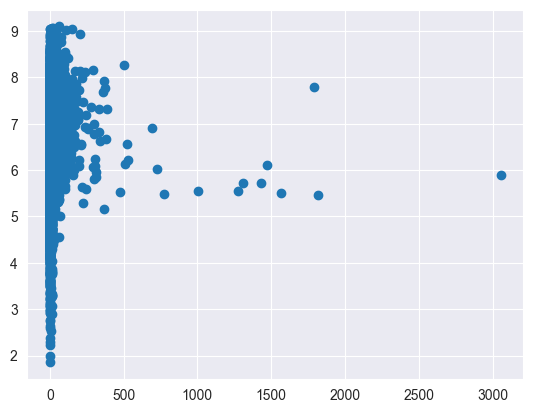

In [20]:
plt.scatter(anime_dataset['Episodes'], anime_dataset['Score'])

In [21]:
anime_dataset['Episodes'].corr(anime_dataset['Score'])

0.06344487582932096

### El valor cercano a 0 (0.063) sugiere una correlación inexistente, por lo que no hay una relación lineal entre la cantidad de episodios y las puntuaciones de los usuarios

## Genre Analysis:
### Which anime genres are most commonly produced?

In [22]:
anime_genres = anime_dataset_df[anime_dataset_df['Genres'] != 'UNKNOWN']['Genres'].copy()

In [23]:
split_values = anime_genres.str.split(',')
flat_values = [item.strip() for sublist in split_values for item in sublist]
qty_genres = pd.Series(flat_values).value_counts().to_frame()

In [24]:
qty_genres.reset_index(inplace=True)

In [25]:
qty_genres.rename(columns={'index': 'Genres'}, inplace=True)

In [26]:
qty_genres

,Genres,count
0,Comedy,6901
1,Fantasy,4941
2,Action,4453
3,Adventure,3718
4,Sci-Fi,2915
5,Drama,2648
6,Romance,1849
7,Slice of Life,1673
8,Supernatural,1319
9,Mystery,815


<Axes: xlabel='Genres'>

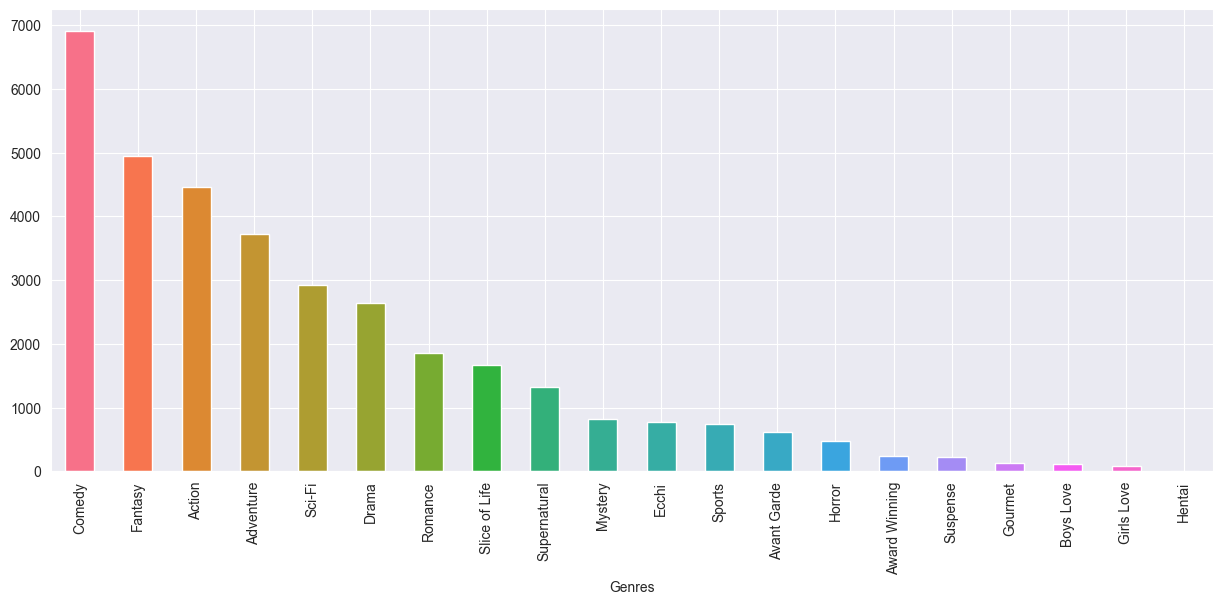

In [27]:
num_bars = len(qty_genres)
random_colors = sns.color_palette('husl', n_colors=num_bars)

qty_genres.plot.bar(x='Genres', y='count', rot=90, figsize=(15,6), color=random_colors, legend=False)

## Genre Analysis:
### Are there certain genres that tend to receive higher ratings?

In [28]:
unique_genres = qty_genres['Genres'].tolist()

In [29]:
anime_genres_score = anime_dataset_df[anime_dataset_df['Genres'] != 'UNKNOWN'][['anime_id', 'Genres', 'Score']].copy()

In [30]:
for col in unique_genres:
    anime_genres_score[col] = 0.0

In [31]:
columns_order = list(anime_genres_score['Genres'])

In [32]:
columns_order

['Action, Award Winning, Sci-Fi',
 'Action, Sci-Fi',
 'Action, Adventure, Sci-Fi',
 'Action, Drama, Mystery, Supernatural',
 'Adventure, Fantasy, Supernatural',
 'Sports',
 'Comedy, Drama, Romance',
 'Comedy, Slice of Life, Sports',
 'Action, Drama',
 'Drama, Mystery, Suspense',
 'Action, Adventure, Fantasy',
 'Action, Adventure, Fantasy',
 'Sports',
 'Action, Sports',
 'Comedy, Romance',
 'Action, Adventure, Comedy, Sci-Fi, Ecchi',
 'Action, Drama, Sci-Fi',
 'Action, Supernatural',
 'Comedy, Gourmet',
 'Action, Drama, Sci-Fi',
 'Action, Avant Garde, Award Winning, Drama, Sci-Fi, Suspense',
 'Drama, Sci-Fi',
 'Avant Garde, Drama, Sci-Fi',
 'Action, Adventure, Drama, Fantasy, Horror',
 'Action, Award Winning, Mystery, Sci-Fi, Suspense',
 'Action, Drama, Romance',
 'Action, Adventure, Comedy, Romance',
 'Drama',
 'Action, Adventure, Horror, Sci-Fi, Supernatural',
 'Adventure, Fantasy, Mystery',
 'Comedy, Romance, Supernatural',
 'Comedy, Romance, Supernatural',
 'Action, Drama, Romance, 

In [33]:
for i, column in enumerate(columns_order):
    columns_order[i] = columns_order[i].split(', ')

In [34]:
anime_genres_score = anime_genres_score[anime_genres_score['Score'] != 'UNKNOWN'].copy()

In [35]:
anime_genres_score['Score'] = pd.to_numeric(anime_genres_score['Score'], errors='coerce')
anime_genres_score.dropna(subset=['Score'], inplace=True)
anime_genres_score.reset_index(drop=True, inplace=True)

anime_genres_score['Score'] = pd.to_numeric(anime_genres_score['Score'], downcast='unsigned')

In [36]:
for i, row in anime_genres_score.iterrows():
    anime_genres_score.loc[i, columns_order[i]] = row['Score']

In [37]:
anime_genres_score_mean_list = []

In [38]:
for col in unique_genres:
    genre_rating = anime_genres_score[anime_genres_score[col] != 0.0]
    mean_rating = genre_rating[col].mean()
    anime_genres_score_mean_list.append((col, round(mean_rating, 4), len(genre_rating)))

In [39]:
mean_rating_genres = pd.DataFrame(anime_genres_score_mean_list, columns=['Genres', 'mean_rating', 'qty_of_ratings'])

In [40]:
mean_rating_genres.sort_values(by='mean_rating', ascending=False)

,Genres,mean_rating,qty_of_ratings
14,Award Winning,6.8284,203
9,Mystery,6.6361,636
5,Drama,6.6139,2194
15,Suspense,6.5981,135
6,Romance,6.5948,1565
3,Adventure,6.5799,2626
4,Sci-Fi,6.5605,2325
11,Sports,6.5480,575
2,Action,6.5372,3395
1,Fantasy,6.5301,2817


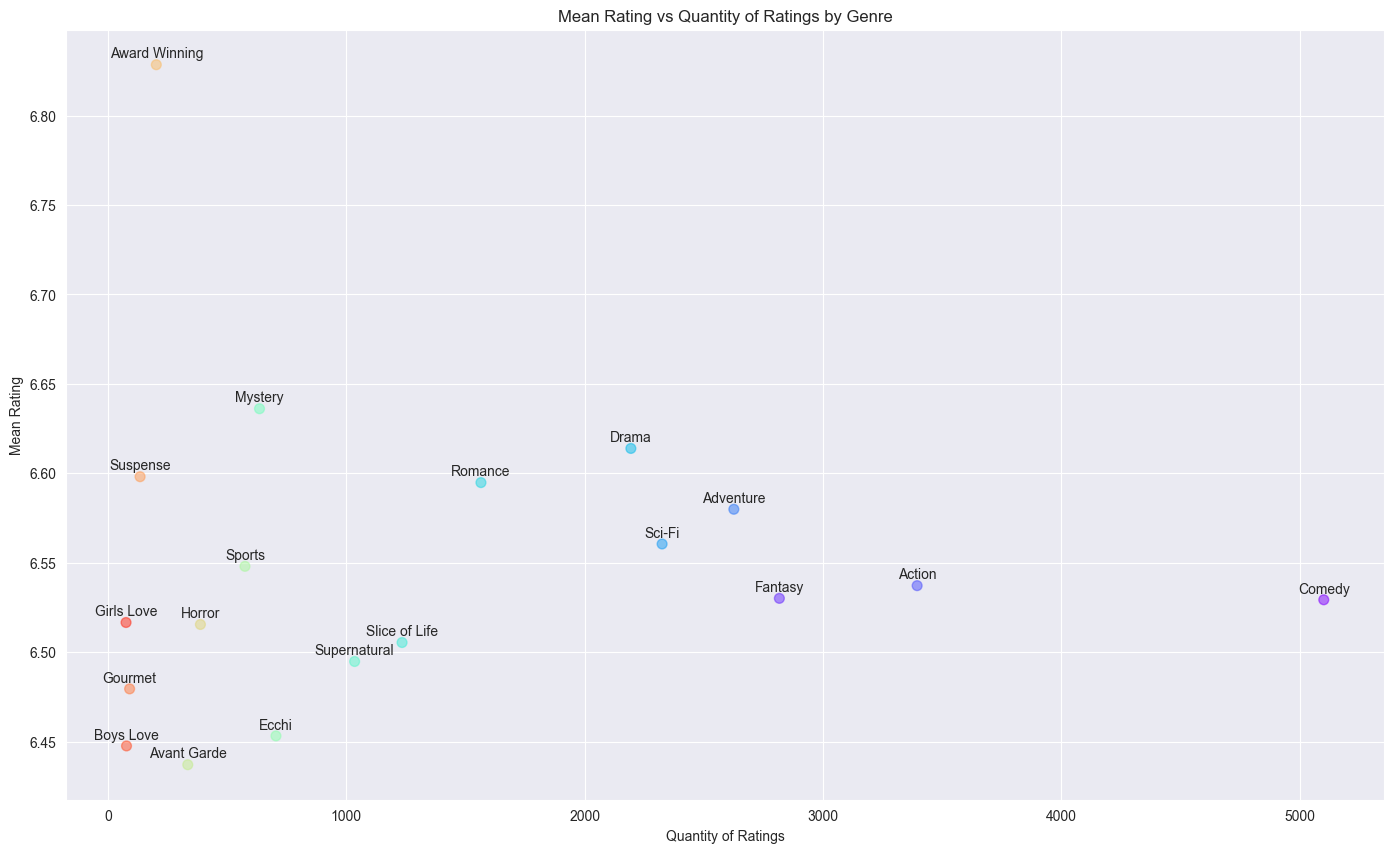

In [41]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(mean_rating_genres['Genres'])))

plt.figure(figsize=(17, 10))
plt.scatter(mean_rating_genres['qty_of_ratings'], mean_rating_genres['mean_rating'], s=50, alpha=0.5, c=colors)

# Annotate each point with its genre
for i, genre in enumerate(mean_rating_genres['Genres']):
    plt.annotate(genre, (mean_rating_genres['qty_of_ratings'][i], mean_rating_genres['mean_rating'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Mean Rating vs Quantity of Ratings by Genre')
plt.xlabel('Quantity of Ratings')
plt.ylabel('Mean Rating')
plt.grid(True)
plt.show()

## Genre Analysis:
### What are the most popular genres among different genders?

In [42]:
#3.4+GB | 1.3GB
final_anime_dataset_df = pd.read_csv('final_animedataset.csv', nrows=20)

In [43]:
final_anime_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   username    20 non-null     object 
 1   anime_id    20 non-null     int64  
 2   my_score    20 non-null     int64  
 3   user_id     20 non-null     int64  
 4   gender      20 non-null     object 
 5   title       20 non-null     object 
 6   type        20 non-null     object 
 7   source      20 non-null     object 
 8   score       20 non-null     float64
 9   scored_by   20 non-null     int64  
 10  rank        20 non-null     float64
 11  popularity  20 non-null     int64  
 12  genre       20 non-null     object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ KB


In [44]:
final_anime_dataset_df['user_id'] = pd.to_numeric(final_anime_dataset_df['user_id'], downcast='unsigned')
final_anime_dataset_df['anime_id'] = pd.to_numeric(final_anime_dataset_df['anime_id'], downcast='unsigned')
final_anime_dataset_df['my_score'] = pd.to_numeric(final_anime_dataset_df['my_score'], downcast='unsigned')
final_anime_dataset_df['score'] = pd.to_numeric(final_anime_dataset_df['score'], downcast='unsigned')
final_anime_dataset_df['scored_by'] = pd.to_numeric(final_anime_dataset_df['scored_by'], downcast='unsigned')
final_anime_dataset_df['popularity'] = pd.to_numeric(final_anime_dataset_df['popularity'], downcast='unsigned')

final_anime_dataset_df['username'] = final_anime_dataset_df['username'].astype('category')
final_anime_dataset_df['gender'] = final_anime_dataset_df['gender'].astype('category')
final_anime_dataset_df['title'] = final_anime_dataset_df['title'].astype('category')
final_anime_dataset_df['type'] = final_anime_dataset_df['type'].astype('category')
final_anime_dataset_df['source'] = final_anime_dataset_df['source'].astype('category')
final_anime_dataset_df['genre'] = final_anime_dataset_df['genre'].astype('category')

In [45]:
column_types = get_column_types(final_anime_dataset_df)

In [46]:
final_anime_dataset_df = pd.read_csv('final_animedataset.csv', dtype=column_types)

In [47]:
final_anime_dataset_df['rank'] = pd.to_numeric(final_anime_dataset_df['rank'], downcast='unsigned')

In [48]:
final_anime_dataset_df['gender'] = final_anime_dataset_df['gender'].apply(lambda x: 'Other' if (x != 'Male' and x != 'Female') else x)

In [49]:
anime_id_values = {}
for _, grouped in final_anime_dataset_df.groupby('anime_id'):
    gender_count = grouped['gender'].value_counts()
    id_ = grouped['anime_id'].values[0]
    male = gender_count['Male'] if 'Male' in gender_count else 0
    female = gender_count['Female'] if 'Female' in gender_count else 0
    other = gender_count['Other'] if 'Other' in gender_count else 0
    anime_id_values[id_] = [male, female, other]

In [50]:
mask_genres_list = []
for genre in unique_genres:
    mask = anime_genres_score[genre] != 0.0
    mask_genres_list.append(anime_genres_score[mask]['anime_id'].values)

In [51]:
gender_genre = pd.DataFrame(0, index=unique_genres, columns=['Male', 'Female', 'Other'])

In [52]:
for i, mask in enumerate(mask_genres_list):
    matching_values = [anime_id_values[index] for index in mask if index in anime_id_values]
    genre_values = pd.DataFrame(matching_values, columns=gender_genre.columns)
    values_list = list(genre_values.sum())
    gender_genre.loc[unique_genres[i]] = values_list

In [53]:
gender_genre = gender_genre.head(19)

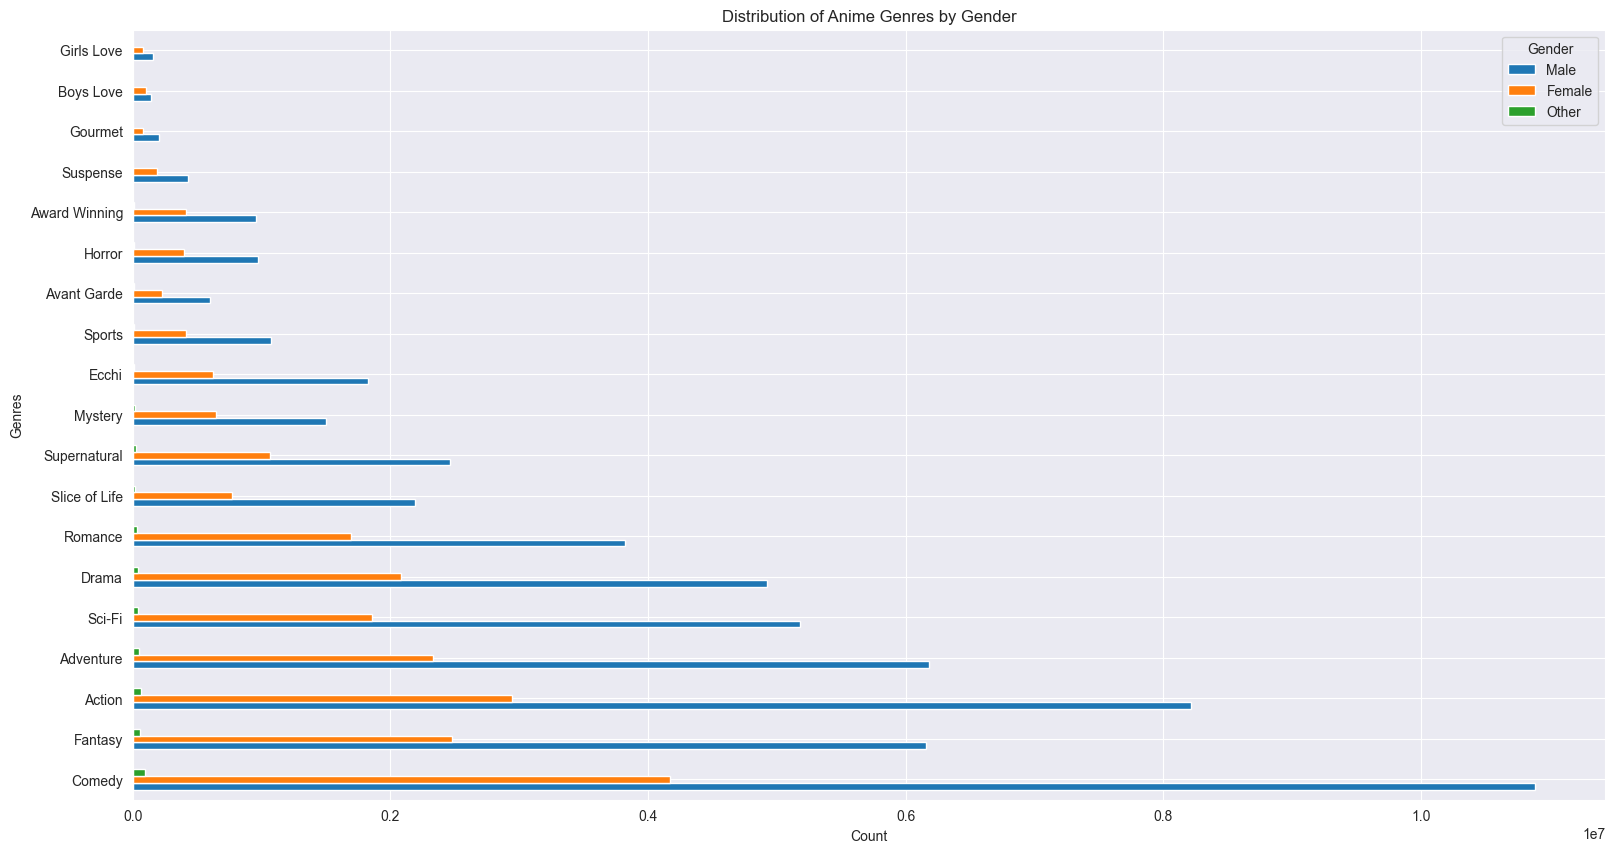

In [54]:
ax = gender_genre.plot(kind='barh', figsize=(19, 10))

ax.set_title('Distribution of Anime Genres by Gender')
ax.set_xlabel('Count')
ax.set_ylabel('Genres')

ax.legend(title='Gender', bbox_to_anchor=(1, 1))

plt.show()

## User Preferences:
### What is the distribution of user ratings for the entire dataset?

In [55]:
anime_ratings_distribution = user_ratings_df[['user_id', 'rating']].copy()

In [56]:
anime_ratings_distribution= anime_ratings_distribution['rating'].value_counts().reset_index()

In [57]:
anime_ratings_distribution.sort_values(by='rating', ascending=True, inplace=True)

<Axes: xlabel='rating'>

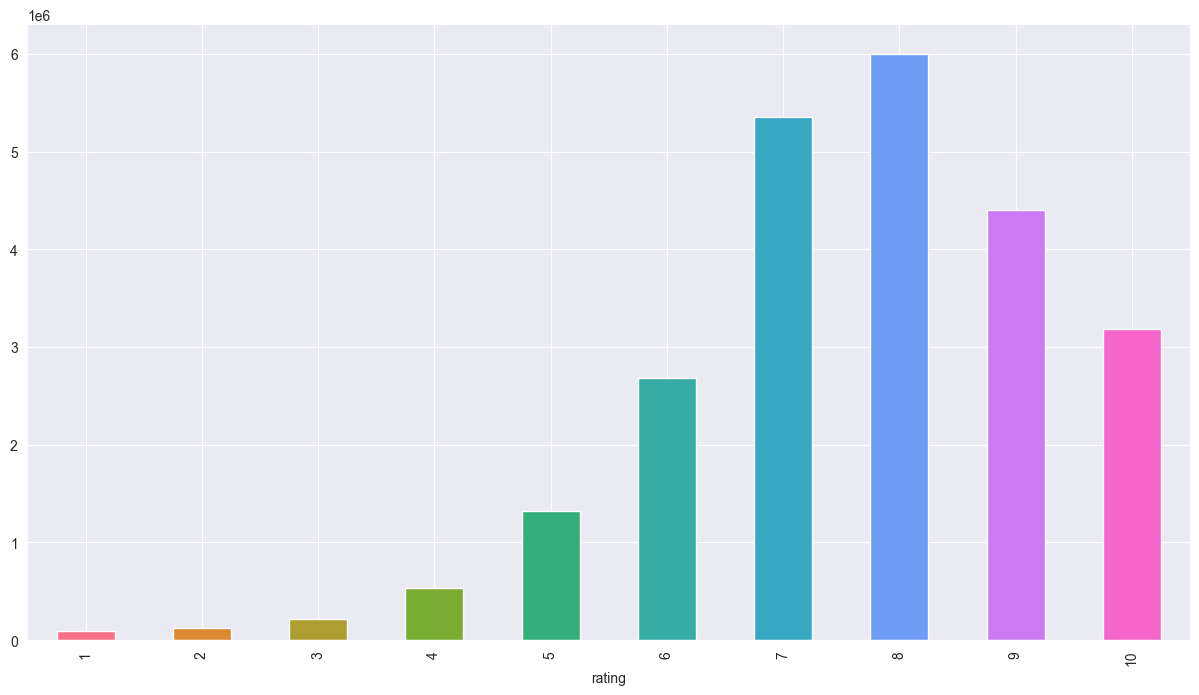

In [58]:
num_bars = len(anime_ratings_distribution)
random_colors = sns.color_palette('husl', n_colors=num_bars)
anime_ratings_distribution.plot.bar(x='rating', y='count', color=random_colors, legend=False, figsize=(15, 8))

## Seasonal Trends:
### Do certain genres become more popular during specific seasons?

In [59]:
seasonal_anime = anime_dataset_df[['anime_id', 'Aired', 'Premiered', 'Genres', 'Studios']].copy()

In [60]:
pd.set_option('future.no_silent_downcasting', True)

In [61]:
unknown_premiered_anime = seasonal_anime[seasonal_anime['Premiered'] == 'UNKNOWN'].copy()

In [62]:
unknown_premiered_anime['Aired'] = unknown_premiered_anime['Aired'].apply(lambda x: x.split(',')[0])
unknown_premiered_anime['Aired'] = unknown_premiered_anime['Aired'].apply(lambda x: x.split(' ')[0])

In [63]:
seasons = {
    'Mar': 'spring',
    'Apr': 'spring',
    'May': 'spring',
    'Jun': 'summer',
    'Jul': 'summer',
    'Aug': 'summer',
    'Sep': 'fall',
    'Oct': 'fall',
    'Nov': 'fall',
    'Dec': 'winter',
    'Jan': 'winter',
    'Feb': 'winter'
}

In [64]:
unknown_premiered_anime['Premiered'] =  unknown_premiered_anime['Aired'].map(seasons).fillna(unknown_premiered_anime['Premiered'])

In [65]:
seasonal_anime.update(unknown_premiered_anime)

In [66]:
seasonal_anime['Premiered'] = seasonal_anime['Premiered'].apply(lambda x: x.split(' ')[0])

In [67]:
seasonal_anime = seasonal_anime[seasonal_anime['Premiered'] != 'UNKNOWN']

In [68]:
seasonal_genre_count = {}
for genre in unique_genres:
    seasonal_genre_count[genre] = 0

In [69]:
columns_ = []
seasonal_genres_values_list = []

In [70]:
for _, grouped in seasonal_anime.groupby('Premiered'):
    seasonal_genre_count = {key: 0 for key in seasonal_genre_count}
    columns_.append(grouped['Premiered'].values[0])
    for row in grouped.itertuples():
        for genre in unique_genres:
            if genre in row.Genres.split(', '):
                seasonal_genre_count[genre] += 1
    seasonal_genres_values_list.append(list(seasonal_genre_count.values()))

In [71]:
seasonal_genres = pd.DataFrame(0, index=unique_genres, columns=columns_)

In [72]:
for i, season in enumerate(columns_):
    seasonal_genres[season] = seasonal_genres_values_list[i]

In [73]:
seasonal_genres = seasonal_genres.reset_index()

In [74]:
seasonal_genres_1 = seasonal_genres.iloc[:6]
seasonal_genres_2 = seasonal_genres.iloc[6:12]
seasonal_genres_3 = seasonal_genres.iloc[12:18]
seasonal_genres_4 = seasonal_genres.iloc[18:]

In [75]:
def plot_graphs_genres_season(df, limit_val):
    
    genres = list(df['index'])

    season_names = {
        'fall':df['fall'].to_list(),
        'spring': df['spring'].to_list(),
        'summer': df['summer'].to_list(),
        'winter': df['winter'].to_list(),
    }
    
    x = np.arange(len(genres))  # the label locations
    width = 0.22  # the width of the bars
    multiplier = 0
    
    fig, _ax = plt.subplots(layout='constrained', figsize=(10,6))
    
    
    for attribute, measurement in season_names.items():
        offset = width * multiplier
        rects = _ax.bar(x + offset, measurement, width, label=attribute)
        _ax.bar_label(rects, padding=4, color='black')
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    _ax.set_ylabel('qty')
    _ax.set_xlabel('Genres')
    _ax.set_title('Genres by season')
    _ax.set_xticks(x + width, genres)
    _ax.legend(loc='upper right', ncols=4)
    _ax.set_ylim(0, limit_val)
    
    plt.show()

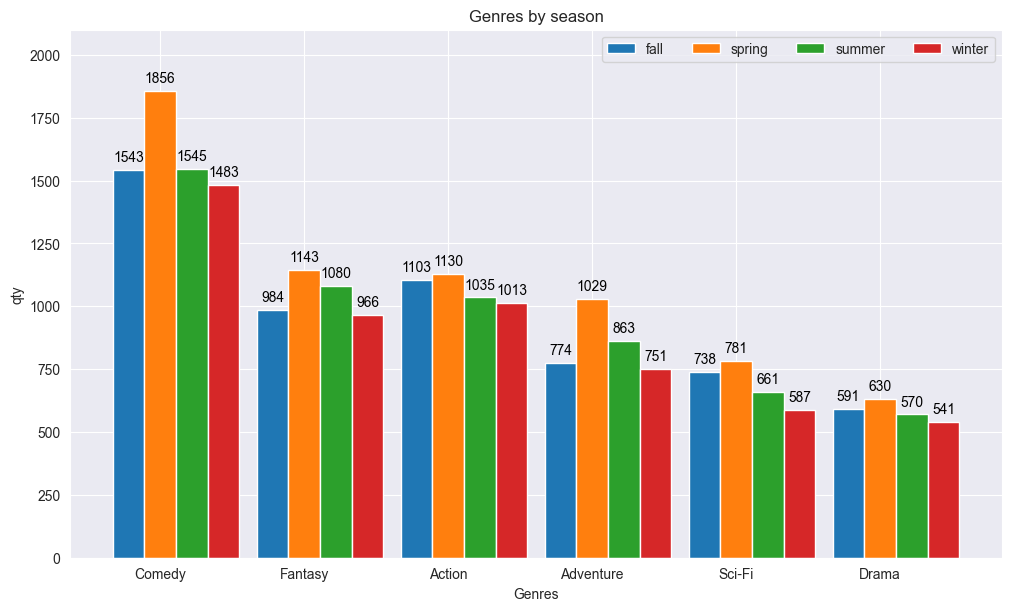

In [76]:
plot_graphs_genres_season(seasonal_genres_1, 2100)

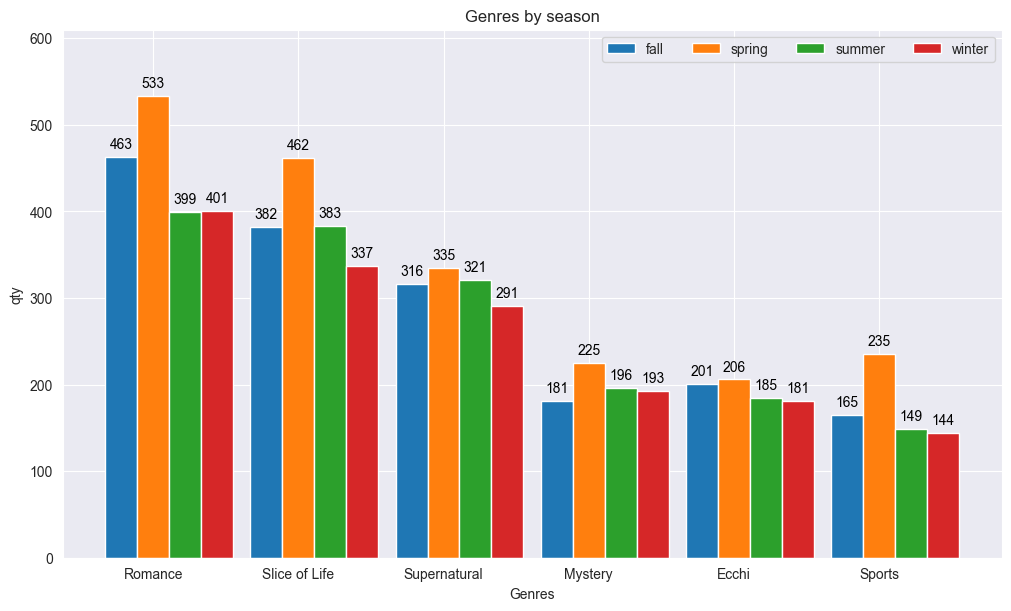

In [77]:
plot_graphs_genres_season(seasonal_genres_2, 610)

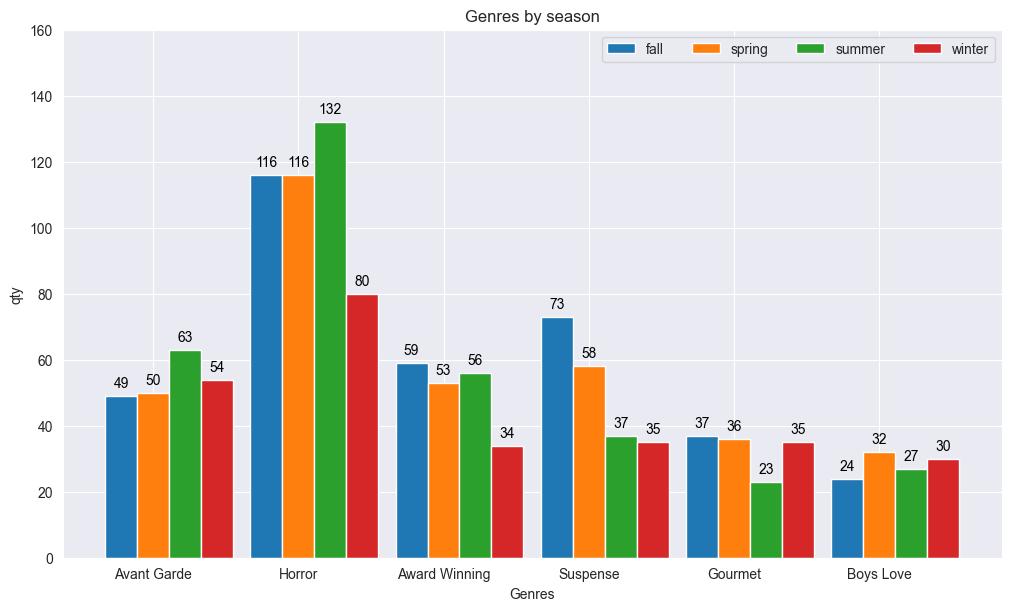

In [78]:
plot_graphs_genres_season(seasonal_genres_3, 160)

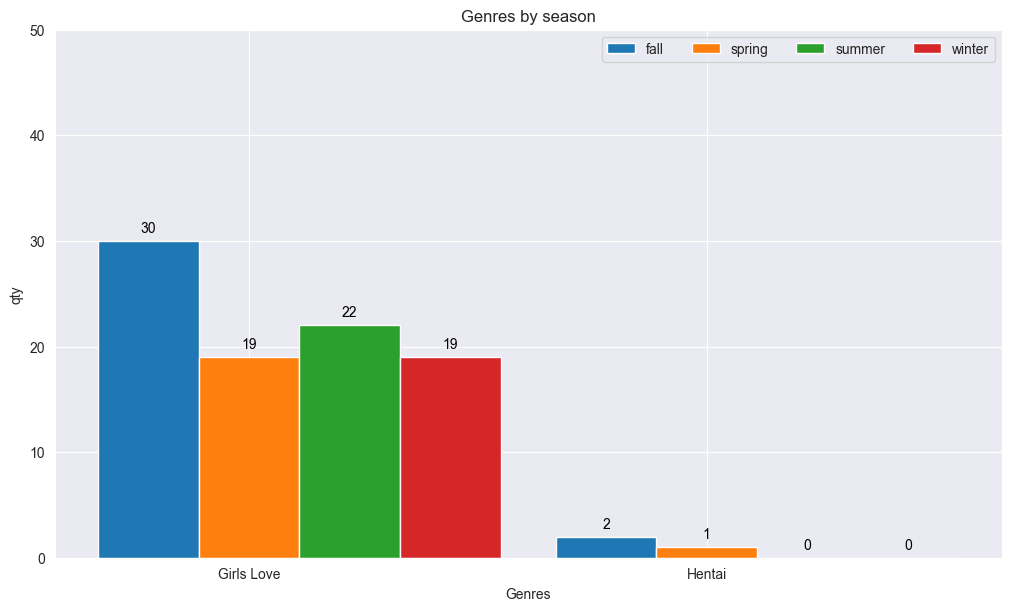

In [79]:
plot_graphs_genres_season(seasonal_genres_4, 50)

## Studios and Directors:
### Which studios or directors have the highest average ratings for their anime?

In [80]:
studios_ratings = anime_dataset_df[['Studios', 'Score', 'Favorites', 'Popularity', 'Rank']].copy()

In [81]:
studios_ratings['Score'] = pd.to_numeric(studios_ratings['Score'], downcast='unsigned', errors='coerce')
studios_ratings.dropna(subset=['Score'], inplace=True)
studios_ratings.reset_index(drop=True, inplace=True)

In [82]:
studios_ratings = studios_ratings.assign(Studios=studios_ratings['Studios'].str.split(', ')).explode('Studios')

In [83]:
studios_ratings_dict = []

In [84]:
for _, grouped in studios_ratings.groupby('Studios'):
    studio = grouped['Studios'].values[0]
    qty_animes = len(grouped)
    mean_rating = grouped['Score'].mean()
    studios_ratings_dict.append((studio, mean_rating, qty_animes))

In [85]:
studios_mean_ratings = pd.DataFrame(studios_ratings_dict, columns=['Studios', 'mean_ratings', 'qty'])
studios_mean_ratings.sort_values(by='mean_ratings', ascending=False, inplace=True)

In [86]:
studios_mean_ratings

,Studios,mean_ratings,qty
290,K-Factory,8.396667,3
395,Nippon Ramayana Film Co.,8.290000,1
174,Egg Firm,8.287500,4
516,Sharefun Studio,8.095000,4
612,Studio Signpost,7.902500,4
...,...,...,...
318,Kuri Jikken Manga Kobo,3.730000,1
478,RAMS,3.330000,1
219,General Entertainment,3.210000,1
99,Brio Animation,3.060000,1


## Studios and Directors:
### Is there a correlation between the involvement of a specific studio or director and the success of an anime?

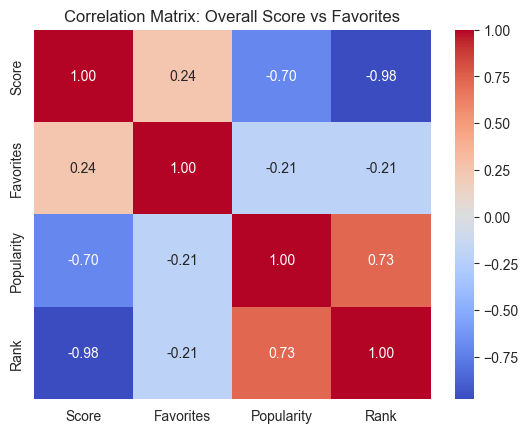

In [87]:
correlation_matrix = studios_ratings[['Score', 'Favorites', 'Popularity', 'Rank']]

correlation_matrix = correlation_matrix[(correlation_matrix['Score'] != 'UNKNOWN')]
correlation_matrix = correlation_matrix[(correlation_matrix['Favorites'] != 'UNKNOWN')]
correlation_matrix = correlation_matrix[(correlation_matrix['Popularity'] != 'UNKNOWN')]
correlation_matrix = correlation_matrix[(correlation_matrix['Rank'] != 'UNKNOWN')]

correlation_matrix = correlation_matrix.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Overall Score vs Favorites')
plt.show()

## User Engagement:
### Are there specific anime that have high engagement but relatively lower ratings?

In [88]:
members_ratings = anime_dataset_df[['anime_id', 'Name', 'Score', 'Members']].copy()

In [89]:
members_ratings.sort_values(['Score', 'Members'],ascending = [True, False], inplace=True)

In [90]:
members_ratings = members_ratings[members_ratings['Members'] > 1000000].head(15)

In [91]:
members_ratings.reset_index(drop=True, inplace=True)

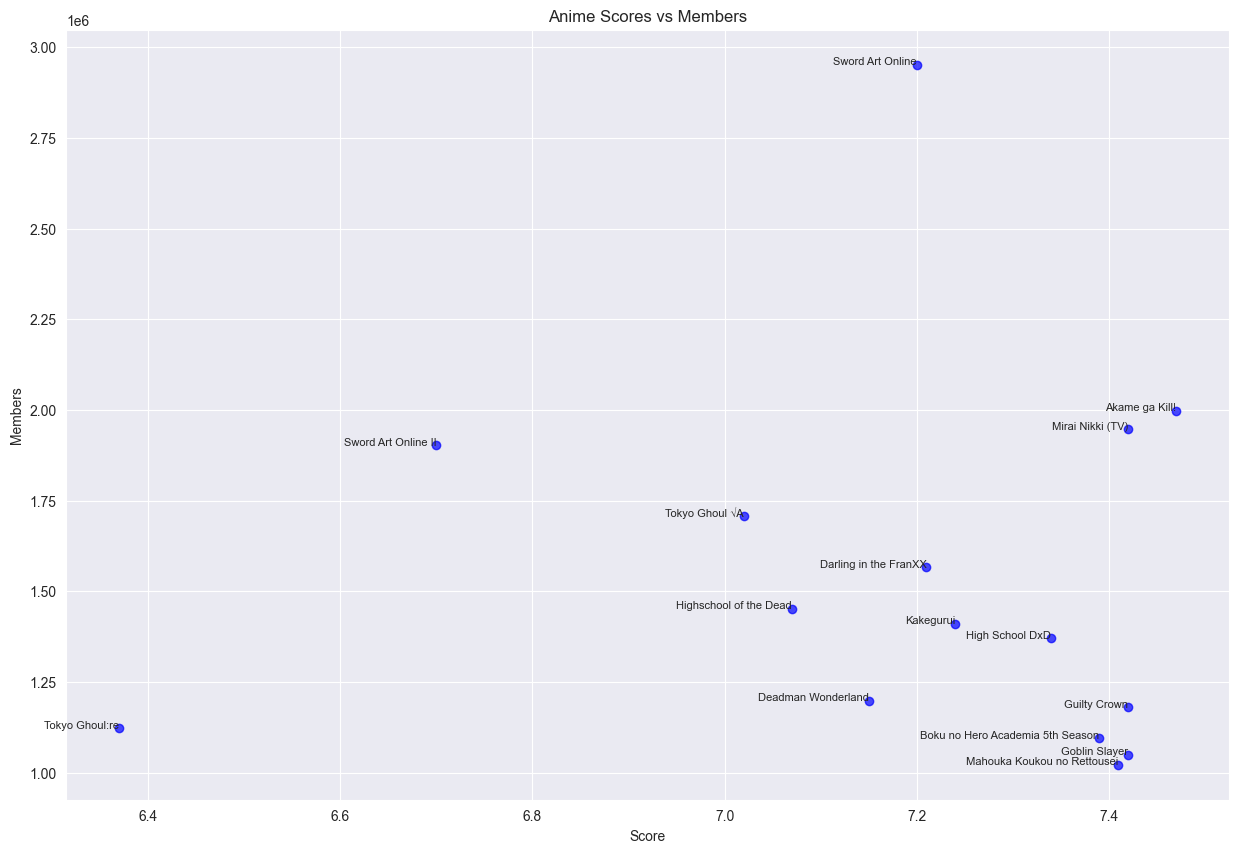

In [92]:
plt.figure(figsize=(15, 10))
plt.scatter(members_ratings['Score'], members_ratings['Members'], color='blue', alpha=0.7)

for i, txt in enumerate(members_ratings['Name']):
    plt.text(members_ratings['Score'][i], members_ratings['Members'][i], txt, fontsize=8, ha='right')

plt.title('Anime Scores vs Members')
plt.xlabel('Score')
plt.ylabel('Members')
plt.grid(True)
plt.show()

## Demographic Analysis:
### Is there a difference in preferences between male and female users?

In [93]:
gender_preference_df = final_anime_dataset_df[(final_anime_dataset_df['gender'] != 'Non-Binary')][['gender', 'genre']].copy()
gender_preference_df = gender_preference_df[~gender_preference_df['genre'].isna()]

In [94]:
male_gender_preference = {}
female_gender_preference = {}

In [95]:
unique_genres = gender_preference_df['genre'].str.split(', ')

In [96]:
from itertools import chain
 
columns_order_genre_unique = set(chain(*unique_genres.tolist()))

In [98]:
columns_order_genre_unique = list(columns_order_genre_unique)

In [99]:
for unique_genre in columns_order_genre_unique:
    male_gender_preference[unique_genre] = 0
    female_gender_preference[unique_genre] = 0

In [111]:
for genre in columns_order_genre_unique:
    mask_male = gender_preference_df['gender'] == 'Male'
    mask_female = gender_preference_df['gender'] == 'Female'
    
    male_pref = gender_preference_df[gender_preference_df['gender'] == 'Male']
    male_gender_preference[genre] = len(male_pref[male_pref['genre'].str.contains(genre)])
    
    female_pref = gender_preference_df[gender_preference_df['gender'] == 'Female']
    female_gender_preference[genre] = len(female_pref[female_pref['genre'].str.contains(genre)])

In [113]:
genres_gender_values = []

In [114]:
for key in male_gender_preference:
    genres_gender_values.append((key, male_gender_preference[key], female_gender_preference[key]))

In [115]:
genres_gender = pd.DataFrame(genres_gender_values, columns=['Genres', 'Male', 'Female'])

In [116]:
genres_gender.sort_values(by=['Male', 'Female'], ascending=False, inplace=True)

In [117]:
genres_gender

,Genres,Male,Female
37,Comedy,12443717,4674081
9,Action,10506464,3482950
20,Romance,7422955,3058903
6,Drama,6718771,3104768
16,Fantasy,6232419,2477082
42,School,6205281,2163059
31,Shounen,5911102,2330924
29,Supernatural,5899197,2408702
33,Sci-Fi,5428070,1658090
12,Adventure,5195149,1970463


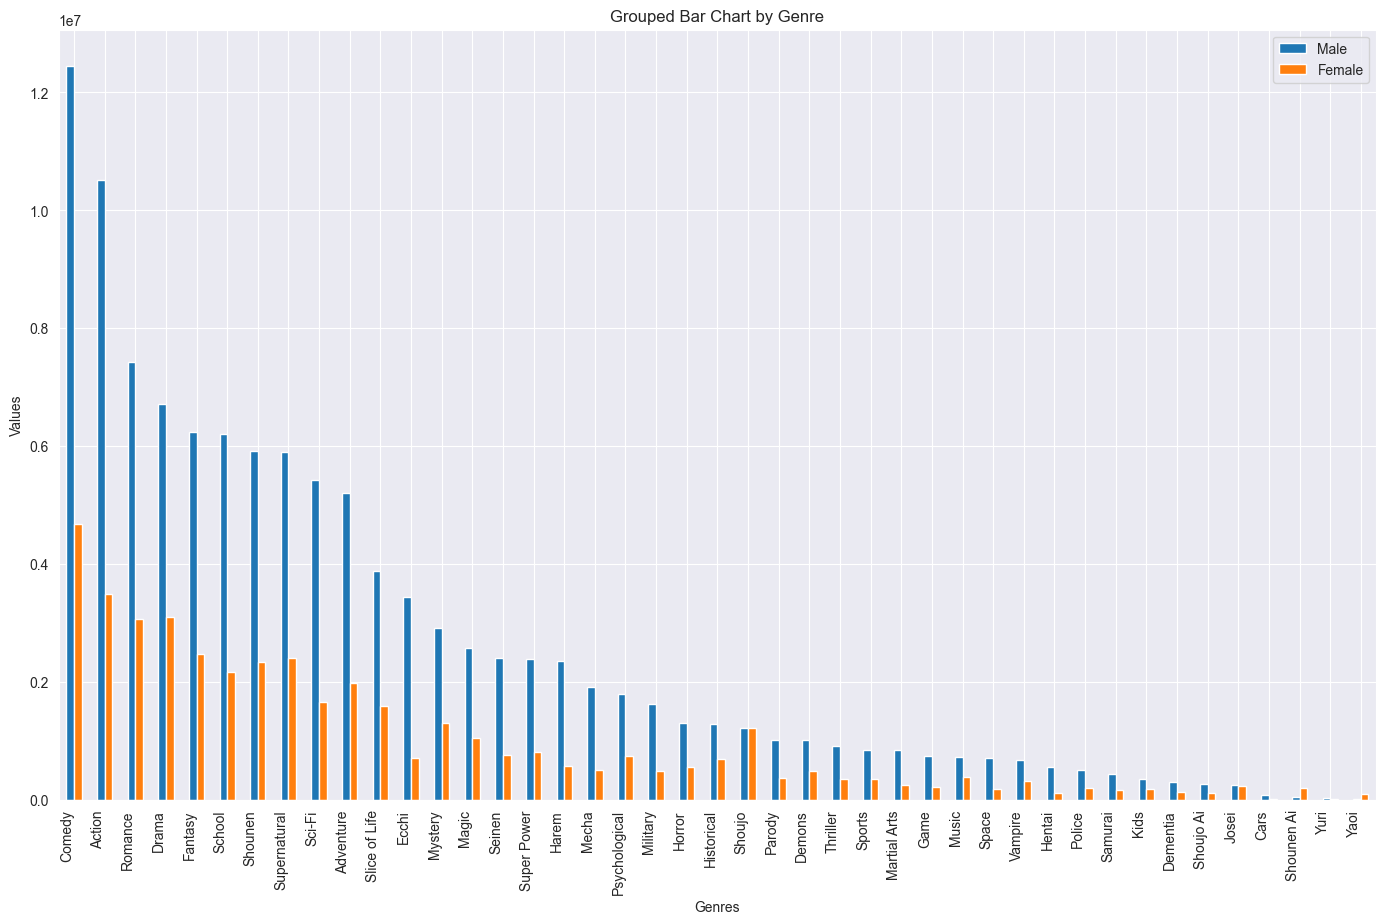

In [118]:
ax = genres_gender.plot(x='Genres', y=['Male', 'Female'], kind='bar', figsize=(17, 10))
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart by Genre')
plt.xticks(rotation=90, ha='right')
plt.show()